### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import scipy

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('/Users/shaikali/Desktop/PCMLAI/module_5/assignment_5_1_starter/data/coupons.csv')

In [6]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
#Discover which variables have null values
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#Drop all rows with null values
clean_data = data.dropna()


4. What proportion of the total observations chose to accept the coupon? 



#Analyzing the table says column Y can answer the question

In [10]:
#Viewing columns in clean_data DF with no null values
clean_data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [25]:
#Query group that said "No" to coupon, or that rejected coupon
rejectedcoupon = clean_data.query("Y==0")


In [26]:
#Query group that said "Yes" to coupon, or that accepted coupon
acceptedcoupon = clean_data.query("Y==1")


In [27]:
#Obtain count for group that said "No", rejected coupon
rejectedcoupon.describe()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.0
mean,63.695652,0.413043,1.0,0.630435,0.108696,0.130435,0.869565,0.0
std,17.652031,0.497821,0.0,0.488021,0.314696,0.340503,0.340503,0.0
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.0
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.0
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.0
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0


46 rejected the coupon.

In [28]:
#Obtain count for group that said "Yes", accepted coupon
acceptedcoupon.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,62.258065,0.387097,1.0,0.596774,0.145161,0.129032,0.870968,1.0
std,18.324878,0.491062,0.0,0.494550,0.355139,0.337972,0.337972,0.0
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.0
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.0
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.0
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0


62 accepted the coupon

In [30]:
#To Calculte the percentage.
46 + 62

108

In [31]:
#Percent that rejected coupon
46/108

0.42592592592592593

In [32]:
#Percept that accepted coupon 
62/108

0.5740740740740741

Therefore, 57.41% chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

In [40]:
#Plotly bar plot to visualize coupon column
px.bar(clean_data, x='coupon',color = "Y")

6. Use a histogram to visualize the temperature column.

In [44]:
px.histogram(clean_data, x="temperature",histnorm='probability density')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [47]:
#Create new data frame that contains just the bar coupons
Bar_DF = clean_data[clean_data['coupon'].str.contains("Bar")]
Bar_DF.head

<bound method NDFrame.head of           destination  passanger weather  temperature  time coupon expiration  \
1239  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
1250             Home      Alone   Sunny           55   6PM    Bar         1d   
1254             Work      Alone   Sunny           55   7AM    Bar         1d   
2613  No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
2617             Home      Alone   Sunny           55   6PM    Bar         1d   
2621             Work      Alone   Sunny           55   7AM    Bar         1d   
3101  No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
3105             Home      Alone   Sunny           55   6PM    Bar         1d   
3109             Work      Alone   Sunny           55   7AM    Bar         1d   
7313  No Urgent Place  Friend(s)   Rainy           55  10PM    Bar         2h   
7321             Home      Alone   Sunny           80   6PM    Bar         2h  

2. What proportion of bar coupons were accepted?


In [48]:
#Generate histogram where x-axis is shows "Bar" variable grouped by "Y" (counts Y=0, "No", and Y=1, "Yes", within bar coupons) 
px.histogram(Bar_DF, x="coupon", color="Y")

The interactive graph gives the proportion of accepted coupons was 3 of 13.  

In [49]:
#Proportion of accepted bar coupons 
3/13

0.23076923076923078

23.08% of bar coupons were accepeted
i.e: 3 of 13 coupons.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [54]:
px.histogram(clean_data, x='Y', color='Bar', marginal = 'box')

By placing the cursor over the left side of the histogram, we can retrieve the sum of individuals who visited a bar three times or less per month, amounting to 86. Similarly, we can obtain the sum of individuals who visited a bar more than three times a month, which was 24.

In [55]:
#Acceptance Rate of visitor over 3 times
10/24

0.4166666666666667

In [56]:
#Acceptance Rate of visitor less than 3 times/month
52/86

0.6046511627906976

Those who went to a bar three or fewer times a month (60.47%) has accepted the coupon more than Ones who went to bar over three/month (41.67%).

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [59]:
#Sort Values in DataFrame by age 
SortbyAge = clean_data.sort_values('age')

In [60]:
#Compare Ages using Bar Plot
px.bar(SortbyAge, x='age', y='Y', color='Bar')

The acceptance rate is 100% for both the group of over 25 years and who foes to bar more than once

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [62]:
# Data Frame with occupations will help us analyse by occupation 
Occupation = clean_data['occupation']

In [65]:
#Explore occupation variable in histogram
px.pie(Occupation, names='occupation')

In [66]:
px.histogram(Occupation, x='occupation')

After removing the null values in the DataFrame during previous steps, it is evident that the data set exclusively consists of occupations other than farming, fishing, or forestry. This finding implies that the data analysis can be conducted without considering the occupation variable.

In [68]:
#Create a bar plot to compare the acceptance rate between drivers who go to bars more than once a month and passengers that were not a kid.
px.bar(clean_data, x='passanger', y='Y', color='Bar')

The rate of acceptance was 100% for the condition given

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Explore marital status

In [69]:
MaritalStatus = clean_data['maritalStatus']

In [70]:
#visual data
px.histogram(MaritalStatus, x='maritalStatus')

In [71]:
#Bar plot showing the acceptance rate between drivers who go to bars more than once a month and passengers that were not a kid.
px.bar(clean_data, x='passanger', y='Y', color='Bar')

By observing the bar graph generated using Plotly and conducting this analysis, it becomes evident that all groups have accepted the coupon, and there are no instances where the value is zero (Y=0). Consequently, the acceptance rate for drivers who visit bars more than once a month, have non-child passengers, and possess a marital status other than widowed is 100% and equal across these groups.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

My Observations:

Upon completing the comprehensive data exploration, it becomes evident that the three drivers who accepted the bar coupon share the same age and marital status.
Based on this observation, we can speculate that individuals who are 26 years old and single might have a high probability of accepting the bar coupon. 
However, since we only have data for three individuals, it is not appropriate to make a conclusive statement based on the current dataset.

Among drivers who are over the age of 30, visit a bar once a month, have no children, and are not widowed, the acceptance rates vary between 35% and 35.8%.
These groups exhibit a moderate probability of accepting the coupon.

Drivers who visit a bar more than three times exhibit a higher acceptance rate of 54.3%. This finding suggests that individuals who frequent bars are more inclined to accept the coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Lets Write a function to do analysis by other columns

In [39]:
def analysis(col):
    df = pd.DataFrame(sorted(list(clean_data[col].unique())),columns=[col])
    df['Total_Count'] = list(clean_data.groupby(col).Y.count())
    df['Accepted'] = list(clean_data[clean_data.Y==1].groupby(col).Y.count())
    df['Rejected'] = list(clean_data[clean_data.Y==0].groupby(col).Y.count())
    df['Accepted %'] = round(df['Accepted']/df['Total_Count']*100,3)
    df['Rejected %'] = round(df['Rejected']/df['Total_Count']*100,3)
    df = df.sort_values(by='Total_Count', ascending=False)

    fig = plt.subplots(figsize =(8, 4))
    plt.bar(df[col],df['Total_Count'])
    plt.bar(df[col],df['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Count')
    plt.title('Accepted Coupons by '+col)
    plt.show()

    return df

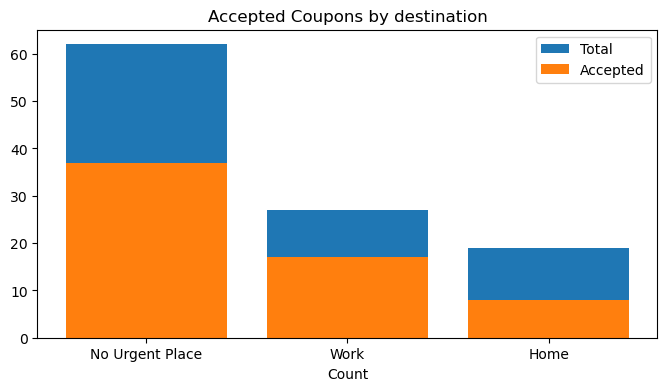

,destination,Total_Count,Accepted,Rejected,Accepted %,Rejected %
1,No Urgent Place,62,37,25,59.677,40.323
2,Work,27,17,10,62.963,37.037
0,Home,19,8,11,42.105,57.895


In [41]:
# Coupon acceptance rate by Destination
analysis('destination')


The graph shows that people going to work uses the coupon more than the other category with less coupon rejection arte

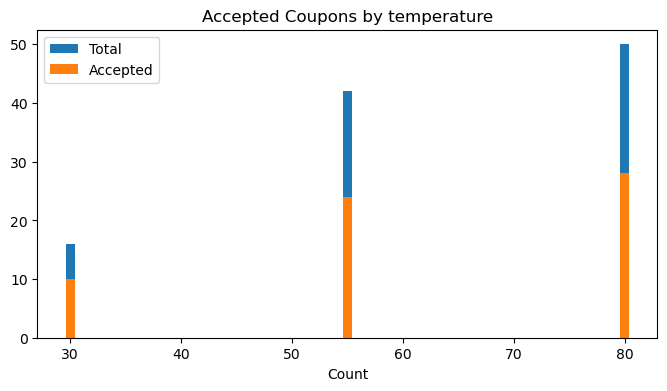

,temperature,Total_Count,Accepted,Rejected,Accepted %,Rejected %
2,80,50,28,22,56.000,44.000
1,55,42,24,18,57.143,42.857
0,30,16,10,6,62.500,37.500


In [42]:
#lets see if the weatehr has an impact
analysis('temperature')

#Sunny weather is a blessing to teh coupons! FDing